# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 643


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=imperial&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": (city.title()), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#     # If an error is experienced, skip the city
    except KeyError as e:
        print(f"City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | provideniya
Processing Record 2 of Set 1 | abha
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | nanortalik
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | lushunkou
City not found. Skipping...
Processing Record 7 of Set 1 | guerrero negro
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | havre-saint-pierre
Processing Record 10 of Set 1 | ulety
Processing Record 11 of Set 1 | cayenne
Processing Record 12 of Set 1 | bathsheba
Processing Record 13 of Set 1 | el dorado
Processing Record 14 of Set 1 | ambodifototra
City not found. Skipping...
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | upernavik
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | vao
Processing Record 19 of Set 1 | broken hill
Processing Record 20 of Set 1 | kieta
Processing Record 21 of Set 1 | cape town
Processing R

Processing Record 38 of Set 4 | sao jose da coroa grande
Processing Record 39 of Set 4 | thompson
Processing Record 40 of Set 4 | mount gambier
Processing Record 41 of Set 4 | stryn
Processing Record 42 of Set 4 | baisha
Processing Record 43 of Set 4 | jamestown
Processing Record 44 of Set 4 | vestmannaeyjar
Processing Record 45 of Set 4 | saint-philippe
Processing Record 46 of Set 4 | soligalich
Processing Record 47 of Set 4 | codrington
Processing Record 48 of Set 4 | nguiu
City not found. Skipping...
Processing Record 49 of Set 4 | nishihara
Processing Record 0 of Set 5 | rio cuarto
Processing Record 1 of Set 5 | padang
Processing Record 2 of Set 5 | pangkalanbuun
Processing Record 3 of Set 5 | sept-iles
Processing Record 4 of Set 5 | derzhavinsk
Processing Record 5 of Set 5 | sladkovo
Processing Record 6 of Set 5 | khatanga
Processing Record 7 of Set 5 | aviles
Processing Record 8 of Set 5 | mogadishu
Processing Record 9 of Set 5 | klyuchi
Processing Record 10 of Set 5 | koumac
Pro

City not found. Skipping...
Processing Record 24 of Set 8 | rio gallegos
Processing Record 25 of Set 8 | neryungri
Processing Record 26 of Set 8 | guicheng
City not found. Skipping...
Processing Record 27 of Set 8 | muravlenko
Processing Record 28 of Set 8 | mount forest
Processing Record 29 of Set 8 | stoyba
City not found. Skipping...
Processing Record 30 of Set 8 | la ronge
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | mancio lima
Processing Record 33 of Set 8 | mazagao
Processing Record 34 of Set 8 | bam
Processing Record 35 of Set 8 | ascension
Processing Record 36 of Set 8 | belyy yar
Processing Record 37 of Set 8 | banepa
Processing Record 38 of Set 8 | chernoistochinsk
Processing Record 39 of Set 8 | ola
Processing Record 40 of Set 8 | puerto baquerizo moreno
Processing Record 41 of Set 8 | broome
Processing Record 42 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 43 of Set 8 | ossora
Processing Record 44 of Set 8 | zlit

Processing Record 8 of Set 12 | andra
Processing Record 9 of Set 12 | manokwari
Processing Record 10 of Set 12 | qinzhou
Processing Record 11 of Set 12 | jiroft
City not found. Skipping...
Processing Record 12 of Set 12 | cossato
Processing Record 13 of Set 12 | sobolevo
Processing Record 14 of Set 12 | pasighat
Processing Record 15 of Set 12 | talnakh
Processing Record 16 of Set 12 | monte alegre
Processing Record 17 of Set 12 | kutum
Processing Record 18 of Set 12 | sur
Processing Record 19 of Set 12 | sabang
Processing Record 20 of Set 12 | benghazi
Processing Record 21 of Set 12 | labutta
City not found. Skipping...
Processing Record 22 of Set 12 | stornoway
Processing Record 23 of Set 12 | nantucket
Processing Record 24 of Set 12 | atocha
Processing Record 25 of Set 12 | bayburt
Processing Record 26 of Set 12 | saryshagan
City not found. Skipping...
Processing Record 27 of Set 12 | ouadda
Processing Record 28 of Set 12 | arlit
Processing Record 29 of Set 12 | innisfail
Processing 

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Provideniya,64.3833,-173.3000,-2.09,65,100,6.71,RU,1675822214
1,Abha,18.2164,42.5053,51.62,87,0,0.00,SA,1675821989
2,Port Alfred,-33.5906,26.8910,69.19,89,100,1.99,ZA,1675822235
3,Nanortalik,60.1432,-45.2371,4.66,73,10,19.80,GL,1675822236
4,Rikitea,-23.1203,-134.9692,79.97,68,10,9.95,PF,1675822237


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Provideniya,64.3833,-173.3000,-2.09,65,100,6.71,RU,1675822214
1,Abha,18.2164,42.5053,51.62,87,0,0.00,SA,1675821989
2,Port Alfred,-33.5906,26.8910,69.19,89,100,1.99,ZA,1675822235
3,Nanortalik,60.1432,-45.2371,4.66,73,10,19.80,GL,1675822236
4,Rikitea,-23.1203,-134.9692,79.97,68,10,9.95,PF,1675822237


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

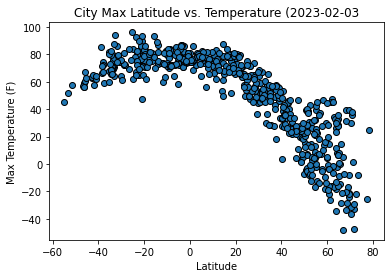

In [15]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']

f, ax = plt.subplots()
ax.scatter(x_axis,y_axis,edgecolors="black")

# Incorporate the other graph properties
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")
ax.set_title("City Max Latitude vs. Temperature (2023-02-07")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

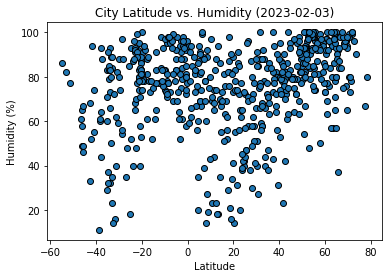

In [16]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']


f, ax = plt.subplots()
ax.scatter(x_axis,y_axis,edgecolors="black")

# Incorporate the other graph properties
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
ax.set_title("City Latitude vs. Humidity (2023-02-07)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

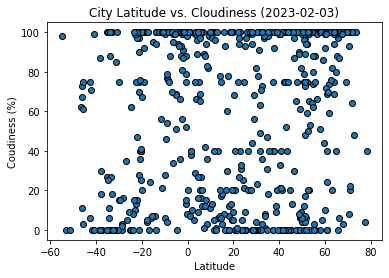

In [17]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']


f, ax = plt.subplots()
ax.scatter(x_axis,y_axis,edgecolors="black")

# Incorporate the other graph properties
ax.set_xlabel("Latitude")
ax.set_ylabel("Coudiness (%)")
ax.set_title("City Latitude vs. Cloudiness (2023-02-07)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

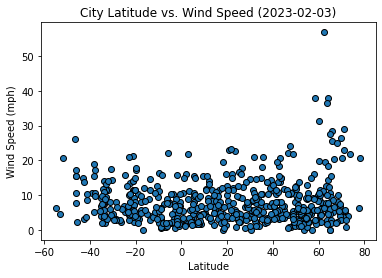

In [18]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']


f, ax = plt.subplots()
ax.scatter(x_axis,y_axis,edgecolors="black")

# Incorporate the other graph properties
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")
ax.set_title("City Latitude vs. Wind Speed (2023-02-07)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots

def linear_regression(x_axis, y_axis):

    # Create variables to call from plots outside the function
    global regress_values, line_eq, rvalue
    
    #Calculate the linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
    
    # Create line values
    regress_values = x_axis * slope + intercept
    
    # Return equation for annotation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))




In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Provideniya,64.3833,-173.3000,-2.09,65,100,6.71,RU,1675822214
1,Abha,18.2164,42.5053,51.62,87,0,0.00,SA,1675821989
3,Nanortalik,60.1432,-45.2371,4.66,73,10,19.80,GL,1675822236
5,Guerrero Negro,27.9769,-114.0611,64.89,30,0,6.46,MX,1675822239
7,Havre-Saint-Pierre,50.2334,-63.5986,15.04,79,100,12.55,CA,1675822239


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,Port Alfred,-33.5906,26.8910,69.19,89,100,1.99,ZA,1675822235
4,Rikitea,-23.1203,-134.9692,79.97,68,10,9.95,PF,1675822237
6,Punta Arenas,-53.1500,-70.9167,51.91,82,0,4.61,CL,1675822054
12,Vaini,-21.2000,-175.2000,84.36,79,75,6.91,TO,1675822243
14,Ushuaia,-54.8000,-68.3000,45.36,86,98,6.29,AR,1675822173


###  Temperature vs. Latitude Linear Regression Plot

The correlation between latiude and temperature is: 0.76


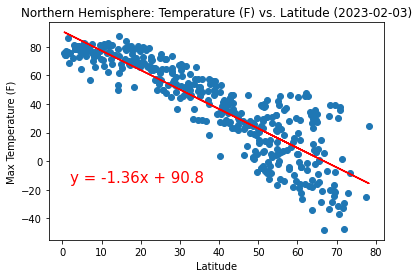

In [22]:
# Linear regression on Northern Hemisphere

x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Max Temp']

# Run our linear_regression function declared above
linear_regression(x_axis, y_axis)

# Generate the plot
plt.scatter(x_axis, y_axis)
plt.title("Northern Hemisphere: Temperature (F) vs. Latitude (2023-02-07)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(2,-15),fontsize=15,color="red")
print(f"The correlation between latiude and temperature is: {round((rvalue**2),2)}")

plt.show()

The correlation between latiude and temperature is: 0.19


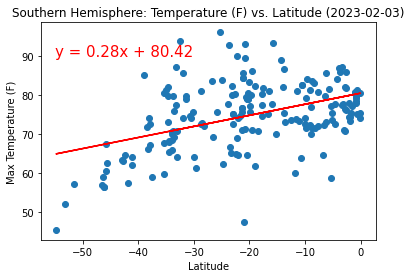

In [23]:
# Linear regression on Southern Hemisphere

x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']

# Run our linear_regression function declared above
linear_regression(x_axis, y_axis)

# Generate the plot
plt.scatter(x_axis, y_axis)
plt.title("Southern Hemisphere: Temperature (F) vs. Latitude (2023-02-07)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,90),fontsize=15,color="red")
print(f"The correlation between latiude and temperature is: {round((rvalue**2),2)}")

plt.show()

**Discussion about the linear relationship:** The temperatures increase as you get closer to the equator (longitude = 0), but the temperature variance is much higher in the norther hemisphere, with locations with a max temperature well below 0F, while in the souther hempisphere, temperatures remained above 50F. The cities pulled, did not fall as far south (minimum latitude under -60), while in the north, many locations fell above the 50 degree latitudinal threshold.

### Humidity vs. Latitude Linear Regression Plot

The correlation between latiude and humidty is: 0.18


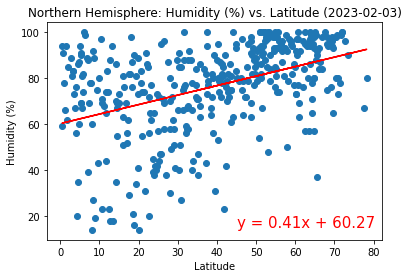

In [26]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Humidity']

# Run our linear_regression function declared above
linear_regression(x_axis, y_axis)

# Generate the plot
plt.scatter(x_axis, y_axis)
plt.title("Northern Hemisphere: Humidity (%) vs. Latitude (2023-02-07)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(45,15),fontsize=15,color="red")
print(f"The correlation between latiude and humidty is: {round((rvalue**2),2)}")

plt.show()

The correlation between latiude and humidty is: 0.16


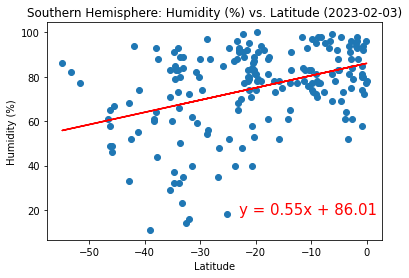

In [29]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Humidity']

# Run our linear_regression function declared above
linear_regression(x_axis, y_axis)

# Generate the plot
plt.scatter(x_axis, y_axis)
plt.title("Southern Hemisphere: Humidity (%) vs. Latitude (2023-02-07)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-23,18),fontsize=15,color="red")
print(f"The correlation between latiude and humidty is: {round((rvalue**2),2)}")

plt.show()

**Discussion about the linear relationship:** Loose correlation betwen the humidity and latitude in either hemisphere. The assumption would be a higher humidty level the closer to the equator, especially in the Northern Hempisphere, where it is currently winter, however, the inverse appears to be true with the humidty level climbing the futher north according to the trend line. This correlation is loose, however.

### Cloudiness vs. Latitude Linear Regression Plot

The correlation between latiude and cloudiness is: 0.06


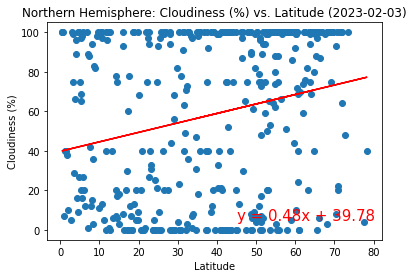

In [30]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']

# Run our linear_regression function declared above
linear_regression(x_axis, y_axis)

# Generate the plot
plt.scatter(x_axis, y_axis)
plt.title("Northern Hemisphere: Cloudiness (%) vs. Latitude (2023-02-07)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(45,5),fontsize=15,color="red")
print(f"The correlation between latiude and cloudiness is: {round((rvalue**2),2)}")

plt.show()

The correlation between latiude and cloudines is: 0.16


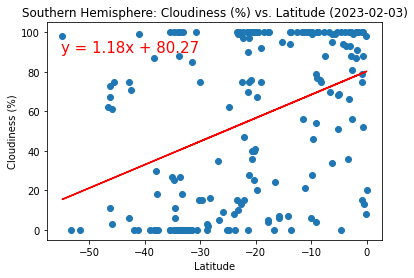

In [31]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']

# Run our linear_regression function declared above
linear_regression(x_axis, y_axis)

# Generate the plot
plt.scatter(x_axis, y_axis)
plt.title("Southern Hemisphere: Cloudiness (%) vs. Latitude (2023-02-07)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,90),fontsize=15,color="red")
print(f"The correlation between latiude and cloudines is: {round((rvalue**2),2)}")

plt.show()

**Discussion about the linear relationship:** There is very low correlation, if any, for the northern and southern hemispheres in this case. This is also highly vairable based on weather conditions on any given day.

### Wind Speed vs. Latitude Linear Regression Plot

The correlation between latiude and wind speed is: 0.02


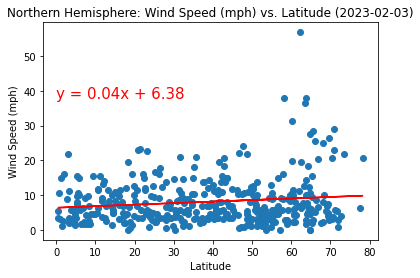

In [32]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']

# Run our linear_regression function declared above
linear_regression(x_axis, y_axis)

# Generate the plot
plt.scatter(x_axis, y_axis)
plt.title("Northern Hemisphere: Wind Speed (mph) vs. Latitude (2023-02-07)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,38),fontsize=15,color="red")
print(f"The correlation between latiude and wind speed is: {round((rvalue**2), 2)}")

plt.show()

The correlation between latiude and windspeed is: 0.12


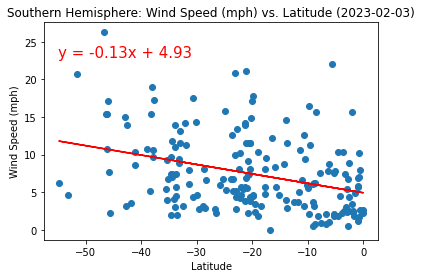

In [34]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']

# Run our linear_regression function declared above
linear_regression(x_axis, y_axis)

# Generate the plot
plt.scatter(x_axis, y_axis)
plt.title("Southern Hemisphere: Wind Speed (mph) vs. Latitude (2023-02-07)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,23),fontsize=15,color="red")

print(f"The correlation between latiude and windspeed is: {round((rvalue**2),2)}")

plt.show()

**Discussion about the linear relationship:** Similar to cloudiness, this is also highly variable on any given day and there is virtually no correlation in either hempisphere.